In [1]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# CSV 파일을 읽어옵니다.
df = pd.read_csv('result.csv')

# 사용자가 입력한 월과 대륙을 받습니다.
user_month = input("해외 여행을 갈 '월'을 입력하세요. (예: 1월): ")
user_continent = input("다음 중 해외 여행을 갈 '대륙'을 입력하세요. (아시아,아메리카,유럽,오세아니아): ")

# 1단계: 사용자가 입력한 월에 해당하는 행만 필터링합니다.
df_filtered_month = df[df['월'] == user_month]

# 2단계: 사용자가 입력한 대륙에 해당하는 행만 필터링합니다.
df_filtered_continent = df_filtered_month[df_filtered_month['대륙'] == user_continent]

# 3단계: 해당 대륙에 있는 나라들의 리스트를 출력합니다.
countries_in_continent = df_filtered_continent['나라'].unique()
print("2022-2023년도 " + user_month+ "에 자연 재해가 일어났던 국가와 그 국가의 지역입니다.:", ', '.join(countries_in_continent))

# 4단계: 국가별로 그룹화하여 해당 국가의 개수를 세어 산점도의 크기를 조정합니다.
country_counts = df_filtered_continent['나라'].value_counts().reset_index()
country_counts.columns = ['나라', 'Count']

# 5단계: geopy를 사용하여 나라의 위치를 찾습니다.
geolocator = Nominatim(user_agent="myGeocoder")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

def get_country_location(country_name):
    try:
        location = geocode(country_name)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error geocoding {country_name}: {e}")
        return None, None

country_counts['위도'], country_counts['경도'] = zip(*country_counts['나라'].apply(get_country_location))

# 유효한 위치가 있는 행만 필터링합니다.
country_counts = country_counts.dropna(subset=['위도', '경도'])

# 6단계: folium을 사용하여 세계지도에 국가별 산점도를 그립니다.
m = folium.Map(location=[20, 0], zoom_start=2)

# 7단계: 대륙별로 국가를 표시합니다.
for _, row in country_counts.iterrows():
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=row['Count'] * 2,  # 나라의 수에 따라 크기를 조정
        popup=row['나라'],
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(m)

# 8단계: 선택한 대륙에 속한 모든 나라의 세부 지역을 시각화합니다.
for country in countries_in_continent:
    df_selected_country = df_filtered_continent[df_filtered_continent['나라'] == country]
    
    marker_cluster = MarkerCluster().add_to(m)
    
    for _, row in df_selected_country.iterrows():
        folium.Marker(
            location=[row['위도'], row['경도']],
            popup=row['지역'],
        ).add_to(marker_cluster)
    
# Jupyter Notebook에 지도를 표시합니다.
display(m)


해외 여행을 갈 '월'을 입력하세요. (예: 1월):  5월
다음 중 해외 여행을 갈 '대륙'을 입력하세요. (아시아,아메리카,유럽,오세아니아):  아메리카


2022-2023년도 5월에 자연 재해가 일어났던 국가와 그 국가의 지역입니다.: 미국, 캐나다, 멕시코


RateLimiter caught an error, retrying (0/2 tries). Called with (*('미국',), **{}).
Traceback (most recent call last):
  File "C:\Users\pdhjs\AppData\Roaming\Python\Python311\site-packages\geopy\geocoders\base.py", line 368, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pdhjs\AppData\Roaming\Python\Python311\site-packages\geopy\adapters.py", line 472, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pdhjs\AppData\Roaming\Python\Python311\site-packages\geopy\adapters.py", line 500, in _request
    raise AdapterHTTPError(
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\pdhjs\AppData\Roaming\Python\Python31

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['STIXSizeTwoSym',
 'DejaVu Serif Display',
 'STIXSizeTwoSym',
 'DejaVu Sans',
 'STIXSizeThreeSym',
 'DejaVu Serif',
 'STIXSizeFourSym',
 'DejaVu Sans Mono',
 'cmex10',
 'cmr10',
 'STIXSizeFiveSym',
 'cmb10',
 'STIXSizeOneSym',
 'STIXGeneral',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'cmmi10',
 'STIXGeneral',
 'DejaVu Serif',
 'DejaVu Sans',
 'STIXGeneral',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'cmss10',
 'STIXSizeOneSym',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'STIXGeneral',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'cmsy10',
 'DejaVu Serif',
 'cmtt10',
 'STIXSizeFourSym',
 'STIXNonUnicode',
 'Tahoma',
 'Microsoft PhagsPa',
 'Sylfaen',
 'Lucida Handwriting',
 'Cambria',
 'Book Antiqua',
 'Vladimir Script',
 'Calibri',
 'Palace Script MT',
 'Wingdings 3',
 'STKaiti',
 'Berlin Sans FB',
 'HancomEQN',
 'MS Reference Specialty',
 'NanumGothic',
 'Magic R',
 'Rockwell Condensed',
 'Playbill',
 'Bodoni MT',
 'Segoe Script',
 'Vivaldi

In [5]:
plt.rcParams['font.family'] = 'NanumGothic'

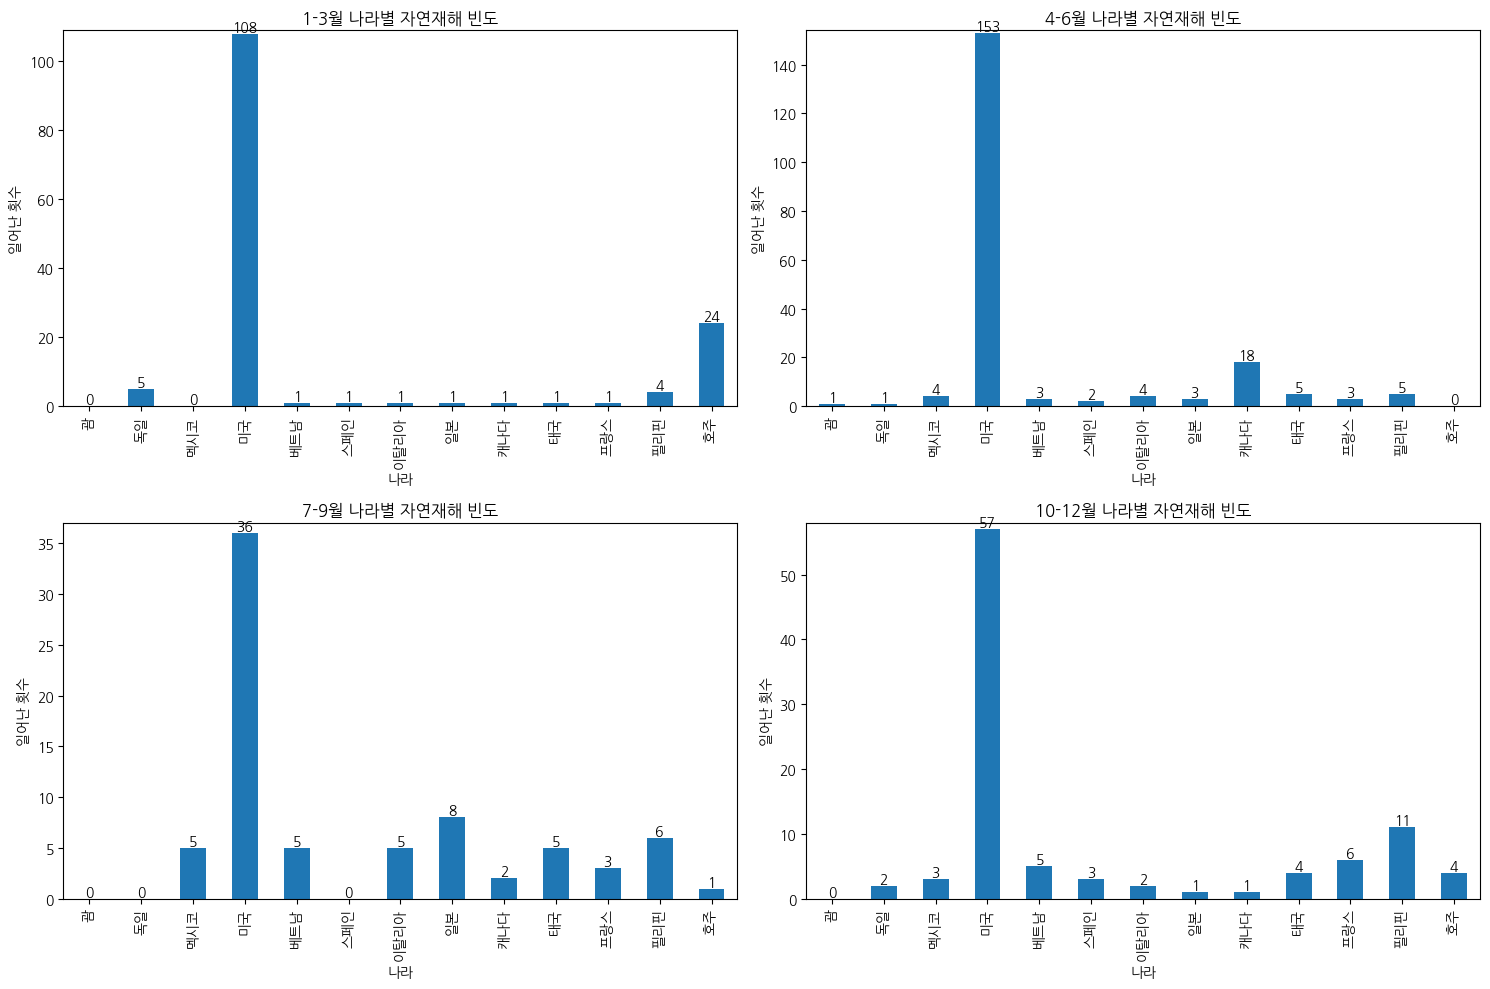

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일을 읽어옵니다.
df = pd.read_csv('result.csv')

# 월을 분기별로 나누는 함수
def categorize_month(month):
    if month in ['1월', '2월', '3월']:
        return '1-3월'
    elif month in ['4월', '5월', '6월']:
        return '4-6월'
    elif month in ['7월', '8월', '9월']:
        return '7-9월'
    elif month in ['10월', '11월', '12월']:
        return '10-12월'
    else:
        return 'Unknown'

# 분기별로 월을 카테고리화
df['분기'] = df['월'].apply(categorize_month)

# 분기별 나라별 빈도 계산
quarter_country_counts = df.groupby(['분기', '나라']).size().unstack(fill_value=0)

# 시각화
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
quarters = ['1-3월', '4-6월', '7-9월', '10-12월']

for ax, quarter in zip(axes.flatten(), quarters):
    if quarter in quarter_country_counts.index:
        counts = quarter_country_counts.loc[quarter]
        counts.plot(kind='bar', ax=ax, title=f'{quarter} 나라별 자연재해 빈도')
        ax.set_xlabel('나라')
        ax.set_ylabel('일어난 횟수')
        ax.set_ylim(0, counts.max() + 1)  # y축 범위를 데이터 최대값보다 조금 크게 설정
        
        # 각 막대 위에 횟수를 표시
        for i in ax.containers:
            ax.bar_label(i, label_type='edge')

plt.tight_layout()
plt.show()


In [3]:
pip install chardet


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/199.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/199.4 kB ? eta -:--:--
   ------------------------ --------------- 122.9/199.4 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 199.4/199.4 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


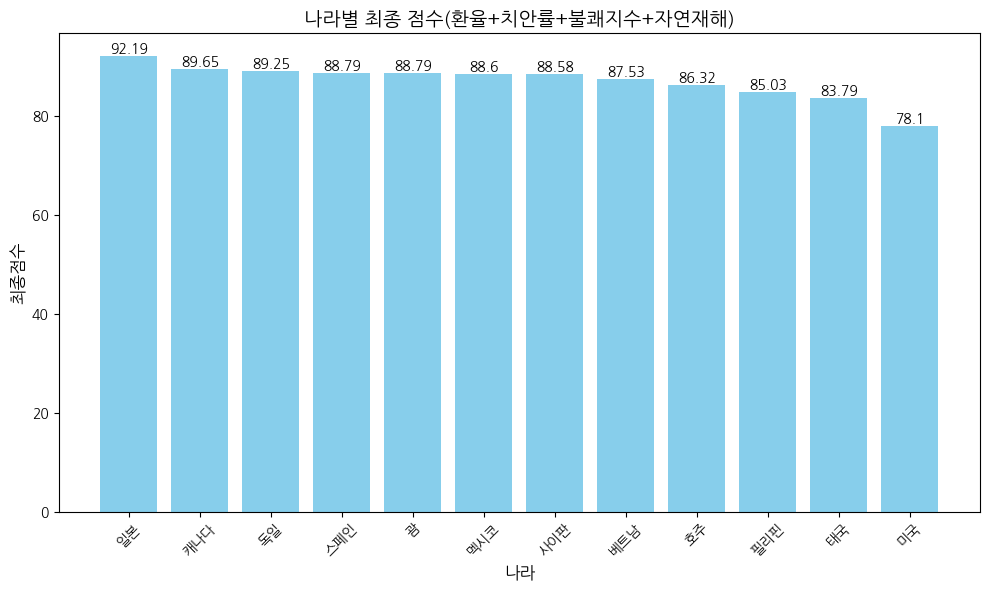

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import chardet

# 파일을 바이너리 모드로 읽기
with open('Final2.csv', 'rb') as file:
    raw_data = file.read()

# 파일의 인코딩 감지
result = chardet.detect(raw_data)
encoding = result['encoding']

# 감지된 인코딩을 사용하여 파일을 읽기
df = pd.read_csv('Final2.csv', encoding=encoding)

# 점수를 내림차순으로 정렬
df = df.sort_values(by='최종 점수', ascending=False)

countries = df['나라']
final_scores = df['최종 점수']

plt.figure(figsize=(10, 6))
bars = plt.bar(countries, final_scores, color='skyblue')

plt.title('나라별 최종 점수(환율+치안률+불쾌지수+자연재해)', fontsize=14)
plt.xlabel('나라', fontsize=12)
plt.ylabel('최종점수', fontsize=12)

plt.xticks(rotation=45)

# 그래프 위에 점수 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


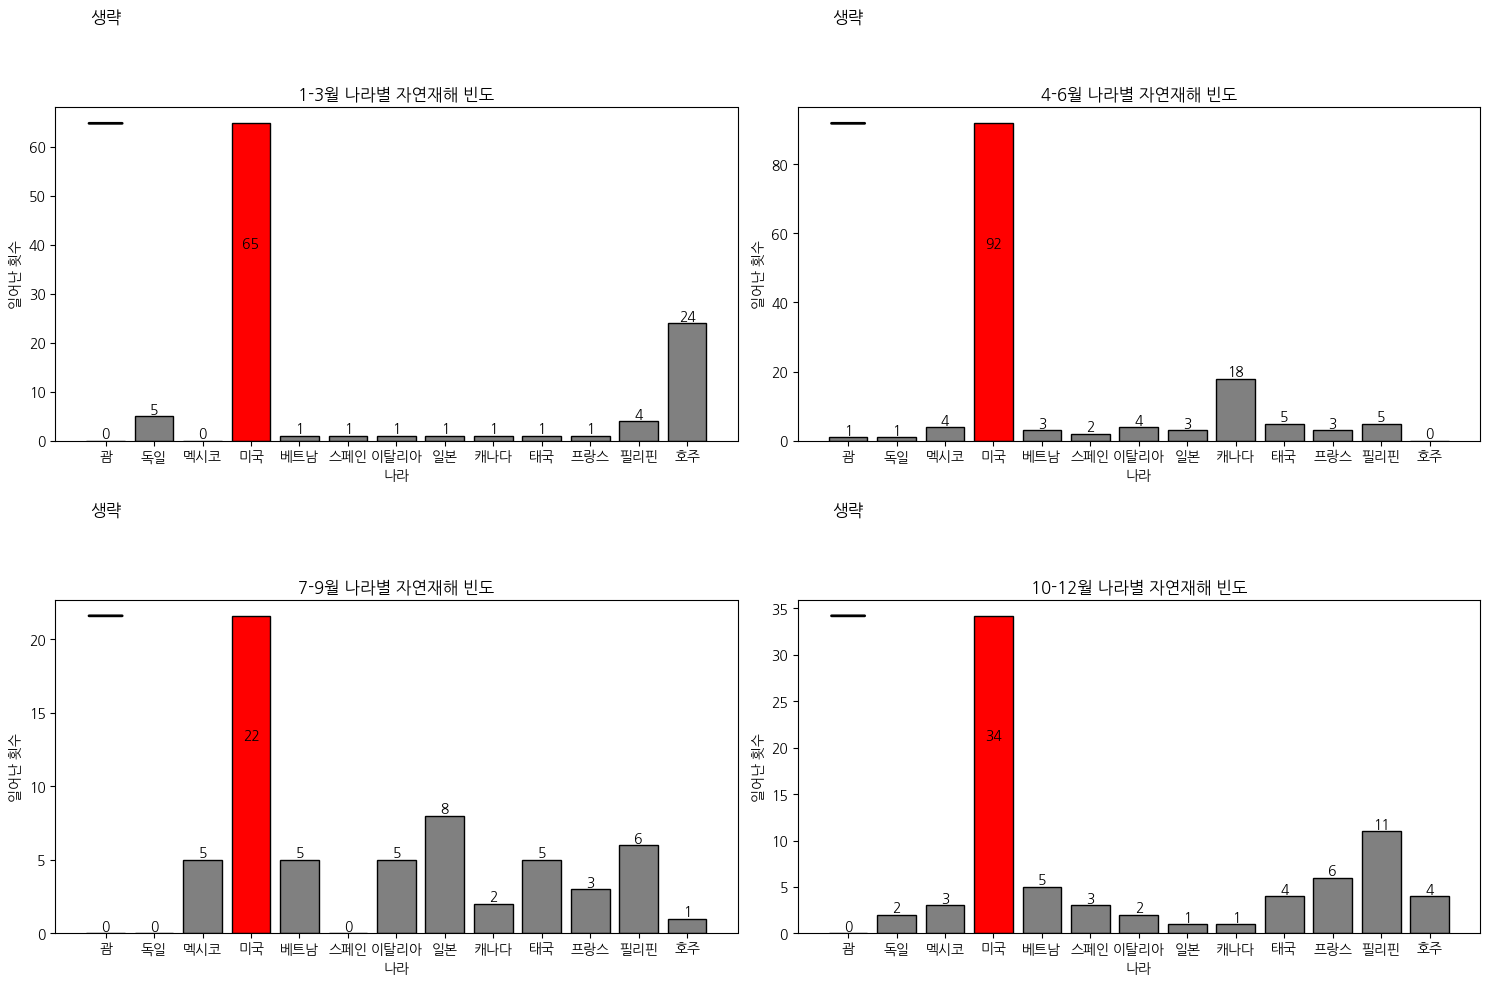

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일을 읽어옵니다.
df = pd.read_csv('result.csv')

# 월을 분기별로 나누는 함수
def categorize_month(month):
    if month in ['1월', '2월', '3월']:
        return '1-3월'
    elif month in ['4월', '5월', '6월']:
        return '4-6월'
    elif month in ['7월', '8월', '9월']:
        return '7-9월'
    elif month in ['10월', '11월', '12월']:
        return '10-12월'
    else:
        return 'Unknown'

# 분기별로 월을 카테고리화
df['분기'] = df['월'].apply(categorize_month)

# 분기별 나라별 빈도 계산
quarter_country_counts = df.groupby(['분기', '나라']).size().unstack(fill_value=0)

# 시각화
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
quarters = ['1-3월', '4-6월', '7-9월', '10-12월']

for ax, quarter in zip(axes.flatten(), quarters):
    if quarter in quarter_country_counts.index:
        counts = quarter_country_counts.loc[quarter]
        max_value = counts.max()
        bar_colors = ['grey' if country != '미국' else 'red' for country in counts.index]

        # 생략선 설정
        cut_off = max_value * 0.6  # 이 값을 조정하여 생략선의 위치를 설정합니다.
        counts_with_cut = counts.apply(lambda x: cut_off if x > cut_off else x)

        bars = ax.bar(counts_with_cut.index, counts_with_cut, color=bar_colors, edgecolor='black')
        ax.set_title(f'{quarter} 나라별 자연재해 빈도')
        ax.set_xlabel('나라')
        ax.set_ylabel('일어난 횟수')

        # 각 막대 위에 횟수를 표시
        for bar in bars:
            height = bar.get_height()
            label_position = height if height < cut_off else height * 0.6
            ax.text(bar.get_x() + bar.get_width() / 2, label_position,
                    f'{height:.0f}', ha='center', va='bottom', fontsize=10)

        # 생략선을 그립니다.
        if '미국' in counts.index:
            ax.annotate('',
                        xy=(bars[0].get_x(), cut_off), xycoords='data',
                        xytext=(bars[0].get_x() + bars[0].get_width(), cut_off), textcoords='data',
                        arrowprops=dict(arrowstyle='-', color='black', lw=2))

            ax.annotate('',
                        xy=(bars[0].get_x(), max_value), xycoords='data',
                        xytext=(bars[0].get_x() + bars[0].get_width(), max_value), textcoords='data',
                        arrowprops=dict(arrowstyle='-', color='black', lw=2))

            ax.text(bars[0].get_x() + bars[0].get_width() / 2, cut_off + (max_value - cut_off) / 2,
                    '생략', ha='center', va='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()


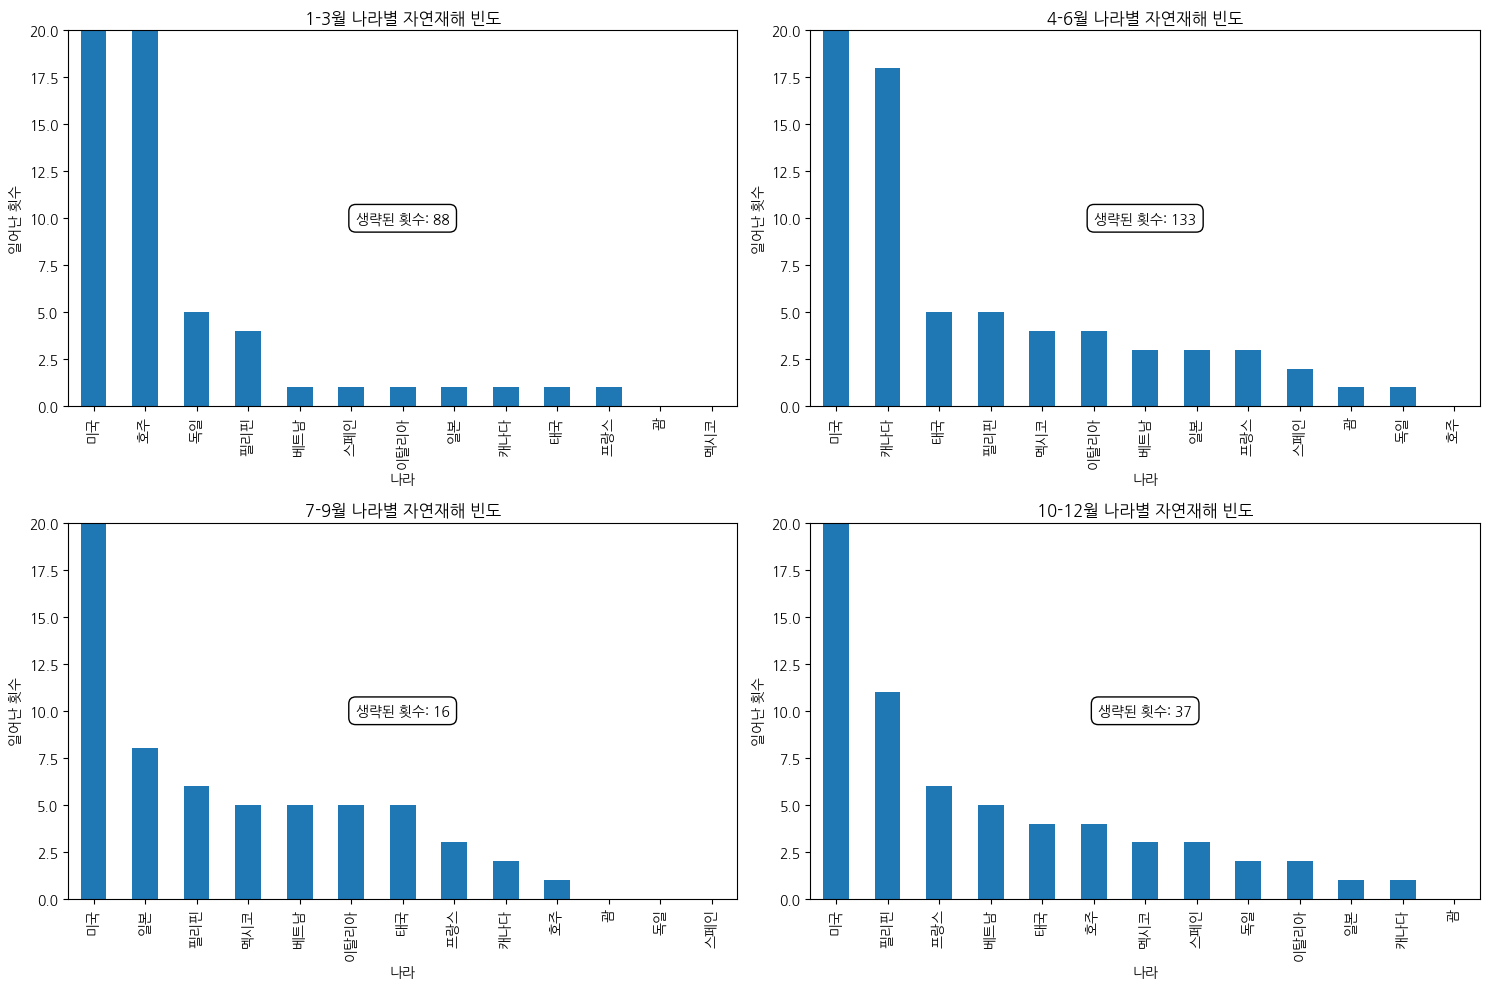

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일을 읽어옵니다.
df = pd.read_csv('result.csv')

# 월을 분기별로 나누는 함수
def categorize_month(month):
    if month in ['1월', '2월', '3월']:
        return '1-3월'
    elif month in ['4월', '5월', '6월']:
        return '4-6월'
    elif month in ['7월', '8월', '9월']:
        return '7-9월'
    elif month in ['10월', '11월', '12월']:
        return '10-12월'
    else:
        return 'Unknown'

# 분기별로 월을 카테고리화
df['분기'] = df['월'].apply(categorize_month)

# 분기별 나라별 빈도 계산
quarter_country_counts = df.groupby(['분기', '나라']).size().unstack(fill_value=0)

# 시각화
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
quarters = ['1-3월', '4-6월', '7-9월', '10-12월']

for ax, quarter in zip(axes.flatten(), quarters):
    if quarter in quarter_country_counts.index:
        counts = quarter_country_counts.loc[quarter]
        counts_sorted = counts.sort_values(ascending=False)
        top_20_counts = counts_sorted[:20]

        # 생략선을 위한 나머지 데이터의 합
        rest_count = counts_sorted[20:].sum()

        # 시각화
        top_20_counts.plot(kind='bar', ax=ax, title=f'{quarter} 나라별 자연재해 빈도')
        ax.set_xlabel('나라')
        ax.set_ylabel('일어난 횟수')
        ax.set_ylim(0, 20)  # y축 범위 설정

        # 미국의 데이터가 상위 20개보다 많은 경우 생략선 추가
        if '미국' in counts.index and counts['미국'] > 20:
            ax.text(0.5, 0.5, f'생략된 횟수: {counts["미국"] - 20}',
                    horizontalalignment='center', verticalalignment='center', transform=ax.transAxes,
                    fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.show()


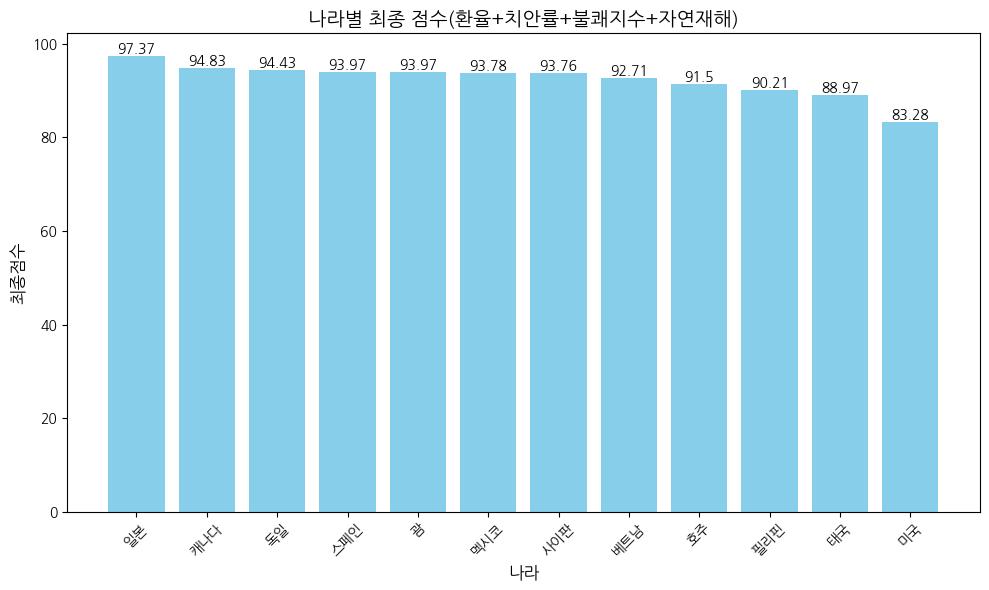

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import chardet

# 파일을 바이너리 모드로 읽기
with open('Final2.csv', 'rb') as file:
    raw_data = file.read()

# 파일의 인코딩 감지
result = chardet.detect(raw_data)
encoding = result['encoding']

# 감지된 인코딩을 사용하여 파일을 읽기
df = pd.read_csv('Final2.csv', encoding=encoding)

# 점수를 내림차순으로 정렬
df = df.sort_values(by='최종 점수', ascending=False)

countries = df['나라']
final_scores = df['최종 점수']

plt.figure(figsize=(10, 6))
bars = plt.bar(countries, final_scores, color='skyblue')

plt.title('나라별 최종 점수(환율+치안률+불쾌지수+자연재해)', fontsize=14)
plt.xlabel('나라', fontsize=12)
plt.ylabel('최종점수', fontsize=12)

plt.xticks(rotation=45)

# 그래프 위에 점수 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# CSV 파일을 읽어옵니다.
df = pd.read_csv('result.csv')

# 사용자가 입력한 월과 대륙을 받습니다.
user_month = input("해외 여행을 갈 '월'을 입력하세요. (예: 1월): ")
user_continent = input("다음 중 해외 여행을 갈 '대륙'을 입력하세요. (아시아,아메리카,유럽,오세아니아): ")

# 1단계: 사용자가 입력한 월에 해당하는 행만 필터링합니다.
df_filtered_month = df[df['월'] == user_month]

# 2단계: 사용자가 입력한 대륙에 해당하는 행만 필터링합니다.
df_filtered_continent = df_filtered_month[df_filtered_month['대륙'] == user_continent]

# 3단계: 해당 대륙에 있는 나라들의 리스트를 출력합니다.
countries_in_continent = df_filtered_continent['나라'].unique()
print("2022-2023년도 " + user_month + "에 자연 재해가 일어났던 국가와 그 국가의 지역입니다.:", ', '.join(countries_in_continent))

# 4단계: 국가별로 그룹화하여 해당 국가의 개수를 세어 산점도의 크기를 조정합니다.
country_counts = df_filtered_continent['나라'].value_counts().reset_index()
country_counts.columns = ['나라', 'Count']

# 5단계: geopy를 사용하여 나라의 위치를 찾습니다.
geolocator = Nominatim(user_agent="myGeocoder", timeout=10)
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# 캐시를 사용하여 중복된 요청을 방지합니다.
location_cache = {}

def get_country_location(country_name):
    if country_name in location_cache:
        return location_cache[country_name]
    try:
        location = geocode(country_name)
        if location:
            location_cache[country_name] = (location.latitude, location.longitude)
            return location.latitude, location.longitude
        else:
            location_cache[country_name] = (None, None)
            return None, None
    except Exception as e:
        print(f"Error geocoding {country_name}: {e}")
        return None, None

country_counts['위도'], country_counts['경도'] = zip(*country_counts['나라'].apply(get_country_location))

# 유효한 위치가 있는 행만 필터링합니다.
country_counts = country_counts.dropna(subset=['위도', '경도'])

# 6단계: folium을 사용하여 세계지도에 국가별 산점도를 그립니다.
m = folium.Map(location=[20, 0], zoom_start=2)

# 7단계: 대륙별로 국가를 표시합니다.
for _, row in country_counts.iterrows():
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=row['Count'] * 2,  # 나라의 수에 따라 크기를 조정
        popup=row['나라'],
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(m)

# 8단계: 선택한 대륙에 속한 모든 나라의 세부 지역을 시각화합니다.
for country in countries_in_continent:
    df_selected_country = df_filtered_continent[df_filtered_continent['나라'] == country]
    
    marker_cluster = MarkerCluster().add_to(m)
    
    for _, row in df_selected_country.iterrows():
        folium.Marker(
            location=[row['위도'], row['경도']],
            popup=f"{row['지역']} ({row['나라']})",
        ).add_to(marker_cluster)

# Jupyter Notebook에 지도를 표시합니다.
display(m)


해외 여행을 갈 '월'을 입력하세요. (예: 1월):  5월
다음 중 해외 여행을 갈 '대륙'을 입력하세요. (아시아,아메리카,유럽,오세아니아):  아메리카


2022-2023년도 5월에 자연 재해가 일어났던 국가와 그 국가의 지역입니다.: 미국, 캐나다, 멕시코


RateLimiter caught an error, retrying (0/2 tries). Called with (*('미국',), **{}).
Traceback (most recent call last):
  File "C:\Users\pdhjs\AppData\Roaming\Python\Python311\site-packages\geopy\geocoders\base.py", line 368, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pdhjs\AppData\Roaming\Python\Python311\site-packages\geopy\adapters.py", line 472, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pdhjs\AppData\Roaming\Python\Python311\site-packages\geopy\adapters.py", line 500, in _request
    raise AdapterHTTPError(
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\pdhjs\AppData\Roaming\Python\Python31

In [3]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# CSV 파일을 읽어옵니다.
df = pd.read_csv('result.csv')

# 사용자가 입력한 월과 대륙을 받습니다.
user_month = input("해외 여행을 갈 '월'을 입력하세요. (예: 1월): ")
user_continent = input("다음 중 해외 여행을 갈 '대륙'을 입력하세요. (아시아, 아메리카, 유럽, 오세아니아): ")

# 1단계: 사용자가 입력한 월에 해당하는 행만 필터링합니다.
df_filtered_month = df[df['월'] == user_month]

# 2단계: 사용자가 입력한 대륙에 해당하는 행만 필터링합니다.
df_filtered_continent = df_filtered_month[df_filtered_month['대륙'] == user_continent]

# 3단계: 해당 대륙에 있는 나라들의 리스트를 출력합니다.
countries_in_continent = df_filtered_continent['나라'].unique()
print("2022-2023년도 " + user_month + "에 자연 재해가 일어났던 국가와 그 국가의 지역입니다.:", ', '.join(countries_in_continent))

# 4단계: 국가별로 그룹화하여 해당 국가의 개수를 세어 산점도의 크기를 조정합니다.
country_counts = df_filtered_continent['나라'].value_counts().reset_index()
country_counts.columns = ['나라', 'Count']

# 5단계: geopy를 사용하여 나라의 위치를 찾습니다.
geolocator = Nominatim(user_agent="myGeocoder", timeout=10)
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# 캐시를 사용하여 중복된 요청을 방지합니다.
location_cache = {}

def get_country_location(country_name):
    if country_name in location_cache:
        return location_cache[country_name]
    try:
        location = geocode(country_name)
        if location:
            location_cache[country_name] = (location.latitude, location.longitude)
            return location.latitude, location.longitude
        else:
            location_cache[country_name] = (None, None)
            return None, None
    except Exception as e:
        print(f"Error geocoding {country_name}: {e}")
        return None, None

country_counts['위도'], country_counts['경도'] = zip(*country_counts['나라'].apply(get_country_location))

# 유효한 위치가 있는 행만 필터링합니다.
country_counts = country_counts.dropna(subset=['위도', '경도'])

# 6단계: folium을 사용하여 세계지도에 국가별 산점도를 그립니다.
m = folium.Map(location=[20, 0], zoom_start=2)

# 7단계: 대륙별로 국가를 표시합니다.
for _, row in country_counts.iterrows():
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=row['Count'] * 2,  # 나라의 수에 따라 크기를 조정
        popup=row['나라'],
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(m)

# 8단계: 선택한 대륙에 속한 모든 나라의 세부 지역을 시각화합니다.
for country in countries_in_continent:
    df_selected_country = df_filtered_continent[df_filtered_continent['나라'] == country]
    
    marker_cluster = MarkerCluster().add_to(m)
    
    for _, row in df_selected_country.iterrows():
        folium.Marker(
            location=[row['위도'], row['경도']],
            popup=f"{row['지역']} ({row['나라']})",
        ).add_to(marker_cluster)

# Jupyter Notebook에 지도를 표시합니다.
display(m)


해외 여행을 갈 '월'을 입력하세요. (예: 1월):  5월
다음 중 해외 여행을 갈 '대륙'을 입력하세요. (아시아, 아메리카, 유럽, 오세아니아):  아메리카


2022-2023년도 5월에 자연 재해가 일어났던 국가와 그 국가의 지역입니다.: 미국, 캐나다, 멕시코


RateLimiter caught an error, retrying (0/2 tries). Called with (*('미국',), **{}).
Traceback (most recent call last):
  File "C:\Users\pdhjs\AppData\Roaming\Python\Python311\site-packages\geopy\geocoders\base.py", line 368, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pdhjs\AppData\Roaming\Python\Python311\site-packages\geopy\adapters.py", line 472, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pdhjs\AppData\Roaming\Python\Python311\site-packages\geopy\adapters.py", line 500, in _request
    raise AdapterHTTPError(
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\pdhjs\AppData\Roaming\Python\Python31